### General rules:
 * For all figures that you generate, remember to add meaningful labels to the axes, and make a legend, if applicable.
 * Do not hard code constants, like number of samples, number of channels, etc in your program. These values should always be determined from the given data. This way, you can easily use the code to analyse other data sets.
 * Do not use high-level functions from toolboxes like scikit-learn.
 * Replace *Template* by your *FirstnameLastname* in the filename, or by *Lastname1Lastname2* if you work in pairs.

# BCI-IL - Exercise Sheet #05

#### Name

In [10]:
% matplotlib inline

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt


import bci_minitoolbox as bci

## Preparation: Load data

In [11]:
fname= 'eyes_closed_VPal.npz'
cnt, fs, clab, mnt =bci.load_data(fname)
print(cnt.shape) #118x5958
print(len(clab)) #118
print(mnt.shape) #118x2

(118, 5958)
118
(118, 2)


## Exercise 1: PCA on raw data  (3 points) 
Make a scatter plot of the data with the two directions of largest variance as coordinate axes. Then, depcit the projection vectors of those two components as scalp maps (function `scalpmap` provided in the `bbci_minitoolbox`).

(118, 5958)
(118, 118)
(118,)
(118, 118)
(118, 2)
(5958, 2)


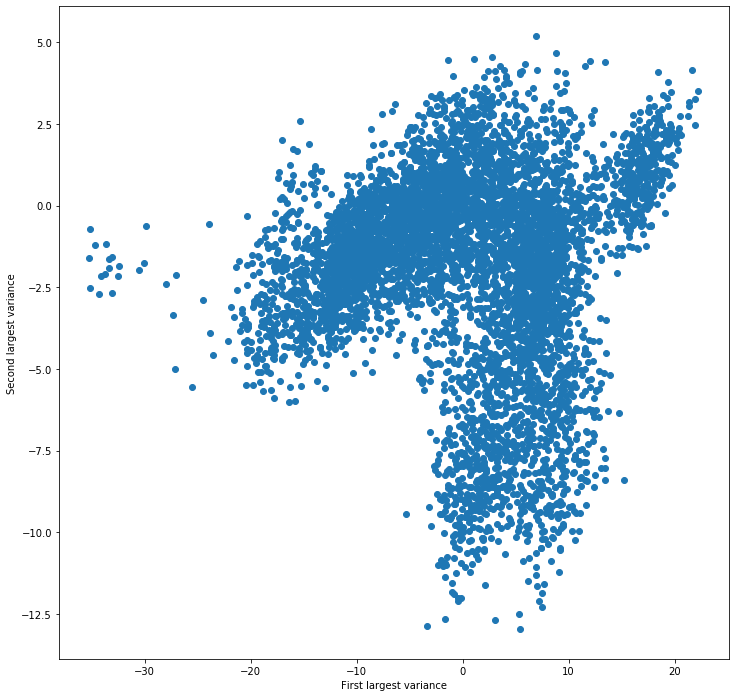

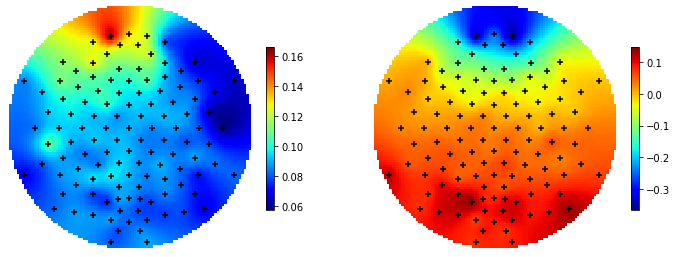

In [26]:
X = (cnt - np.mean(cnt))/np.std(cnt)       # Standardization of variables as pre-processing step


C = np.cov(X)
print(cnt.shape)
print(C.shape)
eig_vals, eig_vecs =np.linalg.eigh(C)
print (eig_vals.shape)
print(eig_vecs.shape)

# Shae the two principal axes as a vector for
matrix_w = np.hstack((eig_vecs[:,-1].reshape(len(eig_vecs),1),eig_vecs[:,-2].reshape(len(eig_vecs),1)))

print ( np.shape(matrix_w))

#Transform the data to the principal axes co-ordinate system
Y = X.T.dot(matrix_w)

print ( np.shape (Y))

plt.figure(figsize = (12,12))
# plt.scatter(eig_vecs[:,-1], eig_vecs[:,-2])
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel("First largest variance")
plt.ylabel("Second largest variance")

plt.figure(figsize = (12,6))
plt.subplot(121)
bci.scalpmap(mnt,eig_vecs[:,-1])
plt.subplot(122)
bci.scalpmap(mnt,eig_vecs[:,-2])

## Exercise 2: Artifact to signal ratio with PCA  (5 points)
For this task we assume that the two components from Ex. \#01 reflect eye movements, while all other components do not contain artifacts from eye movement. If you did not succeed with Ex. \#01, chose an arbitrary component.

Determine for each channel which proportion of the overall variance is caused by eye movements and plot this information as a scalp map. Also, calculate the Signal-To-Noise ratio (SNR) per channel in Decibel (dB).

(2, 5958)
(118, 5958)
[0.04117148 0.0125623  0.01103606 0.02875167 0.06670432 0.04908415
 0.02053914 0.01766199 0.10575103 0.02321465 0.03645448 0.0551194
 0.02710009 0.10572214 0.02903875 0.01586516 0.03044617 0.03476235
 0.03316477 0.0345375  0.02536871 0.1546038  0.11457591 0.03407083
 0.01669189 0.03008247 0.03476775 0.03476789 0.03257575 0.06790173
 0.1815352  0.33189666 0.03324921 0.02544456 0.03201951 0.042952
 0.03113454 0.05727149 0.06628821 0.34167808 0.18550278 0.15053264
 0.02333207 0.0350121  0.07335829 0.0384789  0.08883425 0.06889233
 0.56887516 0.10680973 0.02950028 0.02852497 0.04389717 0.04682786
 0.04598268 0.04243431 0.07489315 0.26481501 0.09139603 0.02883172
 0.03315253 0.04121504 0.06066977 0.03720396 0.06680252 0.07801678
 0.22530586 0.10383847 0.04050055 0.04997187 0.05346817 0.03897511
 0.04586196 0.03832836 0.05847714 0.09586087 0.10841644 0.09057888
 0.04700158 0.06498477 0.04470261 0.07471549 0.03813472 0.04294965
 0.12570646 0.1779728  0.18213524 0.1355307

Text(0.5,1,'Signal-To-Noise Ratio per channel')

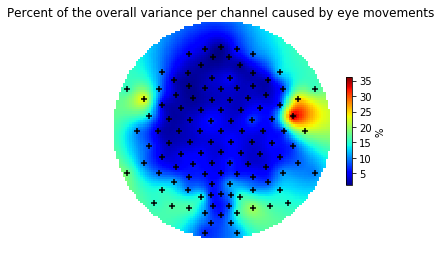

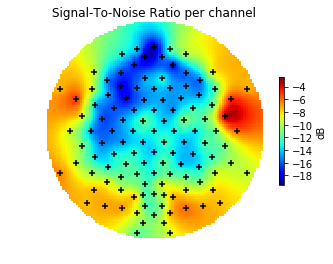

In [4]:
idx=[-1,-2]
cnt_s = V[:, idx].T@cnt # W.TX
print(cnt_s.shape)

x_eyes=V[:,idx]@cnt_s #AS
print(x_eyes.shape)

cnt_artifree=cnt-x_eyes
C_clean = np.cov(cnt_artifree)
C_noise = np.cov(x_eyes)

a = np.diagonal(C).copy()
b = np.diagonal(C_clean).copy()
c = np.diagonal(C_noise).copy()

proportion = np.divide(b,a)
SNR = np.divide(b,c)
print(SNR)
SNR_db = 10 * np.log10(SNR)
print(SNR_db)

plt.figure()
bci.scalpmap(mnt, proportion*100, cb_label = '%')
plt.title('Percent of the overall variance per channel caused by eye movements')

plt.figure()
bci.scalpmap(mnt,SNR_db,cb_label = 'dB')
plt.title('Signal-To-Noise Ratio per channel')


## Preparation: Load data

In [37]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

(55, 2)


## Exercise 3: Artificial EEG data  (7 points)
Generate one trial of artificial, stereotypical EEG data (1000 ms, 55 channels) out of the data set of sheet #01. The
trial should contain a 'clean' target ERP composed of an N2 component (the one negatively peaking at 310 ms in the data on sheet #01) and a P3 component (the one peaking at 380 ms in the data on sheet #01). Both components should have their typical spatial distribution. To this extent, extract the corresponding scalp patterns at the peaks of the average ERPs, calculate the filters, use them to isolate the components from the average ERP and then project them back into the EEG space.
Plot the artificial EEG (the backprojected ERP) in channels PO7 and Cz and the scalp patterns correpsonding to the N2 and P3.

Text(0.5,1,'Scalp pattern of N2')

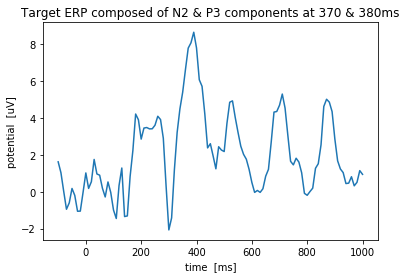

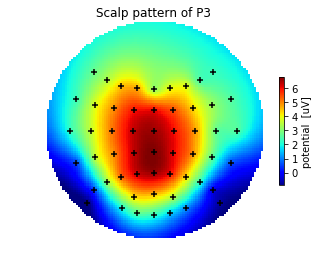

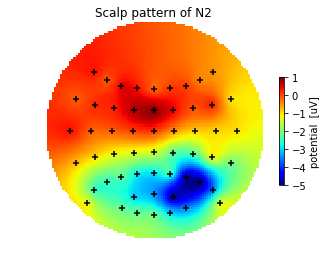

In [126]:
ival= [-100, 1000]
ref_ival= [-100, 0]

# Segment continuous data into epochs:
epo, epo_t = bci.makeepochs(cnt, fs, mrk_pos, ival)
# Baseline correction:
epo = bci.baseline(epo, epo_t, ref_ival)

erp = np.mean(epo[:, :, mrk_class==0], axis=2)

erp_1st_plot = erp[:,clab.index('Cz')] + erp[:,clab.index('PO7')]
maxx = np.where(erp_1st_plot == erp_1st_plot.max())[0][0]
minn = np.where(erp_1st_plot == erp_1st_plot.min())[0][0]

plt.figure()
plt.plot(epo_t, erp_1st_plot)
plt.title('Target ERP composed of N2 & P3 components at 370 & 380ms')
plt.xlabel('time  [ms]')
plt.ylabel('potential  [uV]')

plt.figure()
bci.scalpmap(mnt,erp[maxx,:] , cb_label = 'potential  [uV]')
plt.title('Scalp pattern of P3')

plt.figure()
bci.scalpmap(mnt,erp[minn,:] , cb_label = 'potential  [uV]')
plt.title('Scalp pattern of N2')


## calculate the filters, use them to isolate the components from the average ERP and then project them back into the EEG space.

# no idea what to do here at all, didnt quite get the whole concept of filters and there is no available information
# about that from the slides, so no idea how to proceed further

In [ ]:
##

In [ ]:
##